In [1]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
import os
#load mdtraj
import mdtraj
import mdtraj as md
from matplotlib.backends.backend_pdf import PdfPages

## 6 a) read in the md trajectory of beta amyloid

In [2]:
# top file is ../Data/1hz3_T310.start.nowater.gro
# trajectory file is ../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc
# load the trajectory
traj = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

## 6 b) compute the end-end distance at each time, and the radius of gyration at each time

In [3]:
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)

#compute the radius of gyration
radius=mdtraj.compute_rg(traj)

In [4]:
dist

array([2.4080002, 2.294153 , 2.4405324, 2.3514538, 2.8238873, 3.389765 ,
       2.9046328, 2.9567354, 3.0590065, 4.125036 , 3.451251 , 3.3695395,
       2.1477714, 2.0729964, 2.562689 , 2.211393 , 2.233543 ],
      dtype=float32)

In [5]:
radius

array([0.85057444, 1.00091706, 1.00509146, 0.9700538 , 1.03096215,
       1.08965024, 1.06154491, 1.01728751, 1.0467843 , 1.25890696,
       1.03388204, 1.18969875, 1.03686539, 1.03002704, 1.00622438,
       1.02566947, 1.03948413])

## 6 c) plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled (same y axis is fine this time)

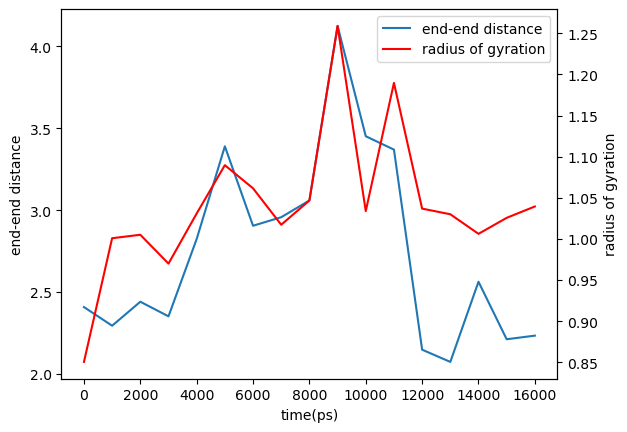

In [6]:
fig=plt.figure()
ax=fig.add_subplot(111)

line_distance=ax.plot(traj.time,dist,label='end-end distance')

ax_left=ax.twinx()
line_radius=ax_left.plot(traj.time,radius,'-r',label='radius of gyration')

ax.legend(line_distance+line_radius,['end-end distance','radius of gyration'],loc=0)
ax.set_xlabel('time(ps)')
ax.set_ylabel('end-end distance')
ax_left.set_ylabel('radius of gyration')

pdf_file=PdfPages('../Figures/task6.pdf')
pdf_file.savefig()

plt.show()

## 6 d) plot a normalized histogram of end-end distance and another of radius of gyration

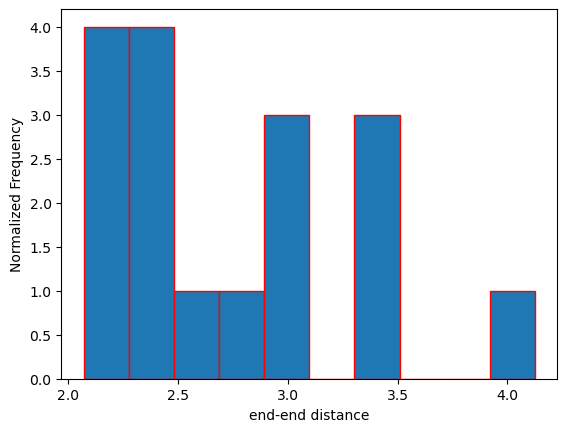

In [7]:
plt.hist(dist,edgecolor='r')
plt.ylabel('Normalized Frequency')
plt.xlabel('end-end distance')

pdf_file.savefig()

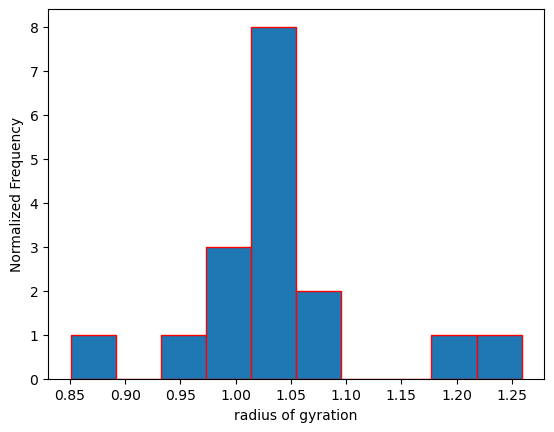

In [8]:
plt.hist(radius,edgecolor='r')
plt.ylabel('Normalized Frequency')
plt.xlabel('radius of gyration')

pdf_file.savefig()

In [9]:
pdf_file.close()